## This notebook was made too predict sotck prices with traditional machine learning algorithms and deep learning

### To run this notebook ensure that you have already the dataset provided by kaggle -> daily-historical-stock-prices-1970-2018

> ensure thatyou have the folder : 
1. /kaggle/input/daily-historical-stock-prices-1970-2018/historical_stock_prices.csv
2. /kaggle/input/daily-historical-stock-prices-1970-2018/historical_stocks.csv

In [388]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #ploting graphics

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/daily-historical-stock-prices-1970-2018/historical_stock_prices.csv
/kaggle/input/daily-historical-stock-prices-1970-2018/historical_stocks.csv


Starting by visualizing data;

In [389]:
missing_values = ["n/a", "na", "--"]

#stock_prices = pd.read_csv('../input/daily-historical-stock-prices-1970-2018/historical_stock_prices.csv')
stocks = pd.read_csv('../input/daily-historical-stock-prices-1970-2018/historical_stocks.csv',na_values = missing_values)

Let's start with a small preview of the corresponding dataframe read previously;

In [390]:
stocks.head()

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
2,TURN,NASDAQ,180 DEGREE CAPITAL CORP.,FINANCE,FINANCE/INVESTORS SERVICES
3,FLWS,NASDAQ,"1-800 FLOWERS.COM, INC.",CONSUMER SERVICES,OTHER SPECIALTY STORES
4,FCCY,NASDAQ,1ST CONSTITUTION BANCORP (NJ),FINANCE,SAVINGS INSTITUTIONS


In [391]:
stocks.columns

Index(['ticker', 'exchange', 'name', 'sector', 'industry'], dtype='object')

We realize there are 5 columns:
- 'ticker' corresponds to the name of the share
- 'exchange' corresponds to the type of exchange made 
- 'name' refers the company's name
- 'sector' refers to the actual sector where the given company operates
- 'industry' specifies the type of services that can be provided

In [392]:
stocks.shape

(6460, 5)

In [393]:
stocks['ticker'].unique().size

6460

> We realize there are 6460 entries to the table, where the unique identifiers are the share's names, meaning that a company's name can show up twice if it has, throughout the established period of time, changed the name of it's stocks. We will note that, for having to change the type of exchange, the companies also changed the name of the shares;

> One example of this is:

In [394]:
stocks[stocks['name'] == "1347 PROPERTY INSURANCE HOLDINGS, INC."]

,ticker,exchange,name,sector,industry
0,PIH,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS
1,PIHPP,NASDAQ,"1347 PROPERTY INSURANCE HOLDINGS, INC.",FINANCE,PROPERTY-CASUALTY INSURERS


> The dataset presents missing values on columns 'sector' and 'industry'

## Tratamento de missing values

#### O primeiro passo a fazer é verificar se estas empresas mudaram de ticker, caso tenham mudado então podem conter o setor e indústria noutra row

> De momento temos os seguintes missing values:

1. ticker         0
2. exchange       0
3. name           0
4. sector      1440
5. industry    1440

> Numa matriz de 6459 rows × 5 columns


> Queremos todas as rows que apreentem valores nulos, assim consegue-se obter o nome dessas empresas.

> Por norma todas as rows que não contém setor não contém indústria e vice-versa

In [395]:
null_data = stocks[stocks.isnull().any(axis=1)]
null_data

,ticker,exchange,name,sector,industry
19,ABP,NASDAQ,ABPRO CORPORATION,NaN,NaN
42,SQZZ,NASDAQ,ACTIVE ALTS CONTRARIAN ETF,NaN,NaN
62,ACT,NASDAQ,ADVISORSHARES VICE ETF,NaN,NaN
100,ABDC,NASDAQ,ALCENTRA CAPITAL CORP.,NaN,NaN
124,SMCP,NASDAQ,ALPHAMARK ACTIVELY MANAGED SMALL CAP ETF,NaN,NaN
...,...,...,...,...,...
6393,WIA,NYSE,WESTERN ASSET/CLAYMORE U.S. TREASURY INFLATION...,NaN,NaN
6431,XFLT,NYSE,XAI OCTAGON FLOATING RATE & ALTERNATIVE INCOME...,NaN,NaN
6451,ZB^A,NYSE,ZIONS BANCORPORATION,NaN,NaN
6452,ZB^G,NYSE,ZIONS BANCORPORATION,NaN,NaN


### Esta função como foi dito anteriormente, verifica se a empresa mudou de ticker

> Caso tenha mudado verificamos se temos alguma instância da empresa que tenha o setor e indústria presente e voltamos a preencher.

In [396]:
pd.options.mode.chained_assignment = None
names = null_data['name'].unique()

for companie in names:
    
    data = stocks[stocks['name'] == companie]
    
    for index,row in data.iterrows():
        
        if(not pd.isnull(row['sector'])):
            
            sector = row['sector']
            industry = row['industry']
            
            tmp = stocks[stocks['name'] == row['name']]
            tmp["sector"] = tmp["sector"].fillna(sector)
            tmp['industry'] = tmp['industry'].fillna(industry)
            stocks[stocks['name'] == row['name']] = tmp


In [397]:
stocks.isnull().sum()

ticker         0
exchange       0
name           0
sector      1018
industry    1018
dtype: int64

> Após esta operação, continuou-se com uma matriz de 6459 rows × 5 columns, mas os missing values alteraram-se, respetivamente:

1. ticker         0
2. exchange       0
3. name           0
4. sector      1018
5. industry    1018
6. dtype: int64

### Nesta parte, todos os restantes missing values são removidos do dataset, por não existir informação sufeciente que nos permita preencher estes valores dado a variadade de setores e indústrias que existem

> Passamos a ter uma matriz de 5442 rows × 5 columns

In [398]:
stocks = stocks.dropna(how='any',axis=0) 
stocks.isnull().sum()

ticker      0
exchange    0
name        0
sector      0
industry    0
dtype: int64

# Exploração do dataset

> Setores predominantes

> Indústrias predominantes

> Stocks Exchanges onde operamos

In [401]:
stocks['name'].unique().size

4551

In [402]:
stocks['exchange'].value_counts()

NASDAQ    2855
NYSE      2587
Name: exchange, dtype: int64

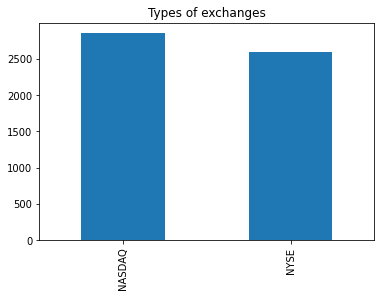

In [403]:
stocks['exchange'].value_counts().plot(kind='bar', title='Types of exchanges')

The number of shares in each type of exchange is rather balanced, which is good for the purpose of ML.

In [404]:
stocks['sector'].value_counts()

FINANCE                  1222
CONSUMER SERVICES         959
HEALTH CARE               784
TECHNOLOGY                609
CAPITAL GOODS             356
ENERGY                    295
PUBLIC UTILITIES          287
BASIC INDUSTRIES          276
CONSUMER NON-DURABLES     226
CONSUMER DURABLES         147
MISCELLANEOUS             142
TRANSPORTATION            138
SECTOR                      1
Name: sector, dtype: int64

In [405]:
stocks = stocks[stocks['sector'] != 'SECTOR']
stocks.shape
#remover a linha dummy

(5441, 5)

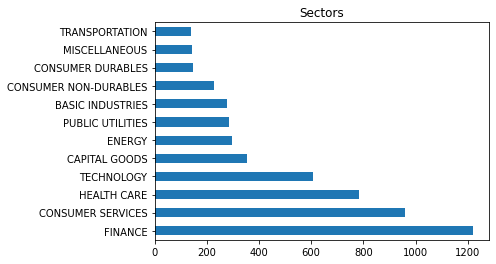

In [406]:
stocks['sector'].value_counts().plot(kind='barh', title='Sectors')

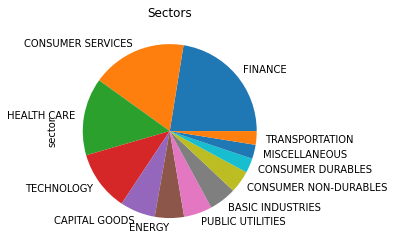

In [407]:
stocks['sector'].value_counts().plot(kind='pie', title='Sectors')

We realize the, throughout the dataset, the Finances sector dominates the sector column, up there with Consumer services and Health care. We can also consider technology, if we allow such leverage.

In [408]:
stocks['industry'].value_counts()

MAJOR BANKS                                        444
MAJOR PHARMACEUTICALS                              419
REAL ESTATE INVESTMENT TRUSTS                      377
BUSINESS SERVICES                                  248
OIL & GAS PRODUCTION                               162
                                                  ... 
GENERAL BLDG CONTRACTORS - NONRESIDENTIAL BLDGS      1
PRECISION INSTRUMENTS                                1
ELECTRONICS DISTRIBUTION                             1
DIVERSIFIED ELECTRONIC PRODUCTS                      1
TOBACCO                                              1
Name: industry, Length: 135, dtype: int64

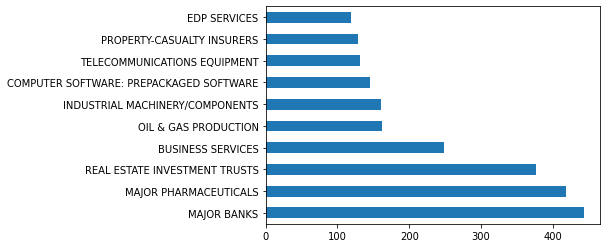

In [409]:
absolute_frequency_top10 = stocks['industry'].value_counts()[:10].copy()
absolute_frequency_top10 = absolute_frequency_top10.rename('')
absolute_frequency_top10.plot(kind='barh')

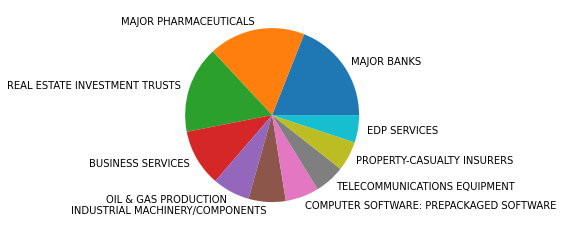

In [410]:
absolute_frequency_top10.plot(kind='pie')

We can observe two major industries ruling the dataset by a considerable margin: Major Pharmaceuticals and Major Banks.